# Assignment 8 : Xarray Groupby


Here will will calculate the NINO 3.4 index of El Nino variabillity and use it to analyze datasets.

First read [this page from NOAA](https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst). It tells you the following.

- The Nino 3.4 region is defined as the region between +/- 5 deg. lat, 170 W - 120 W lon.
- Warm or cold phases of the Oceanic Nino Index are defined by a five consecutive 3-month running mean of sea surface temperature (SST) anomalies in the Niño 3.4 region that is above (below) the threshold of +0.5°C (-0.5°C). This is known as the Oceanic Niño Index (ONI).

(Note that "anomaly" means that the seasonal cycle is removed.)


### 1. Reproduce the SST curve from the figure below

Use the `NOAA_NCDC_ERSST_v3b_SST.nc` file we worked with in class. (You should already have downloaded it; the link is <http://ldeo.columbia.edu/~rpa/NOAA_NCDC_ERSST_v3b_SST.nc>.)

You don't have to match the stylistic details, just the "3mth running mean" curve.


![enso](https://www.ncdc.noaa.gov/monitoring-content/teleconnections/eln-f-pg.gif)

In [1]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
from netCDF4 import Dataset
%matplotlib inline

In [2]:
ds =xr.open_dataset('NOAA_NCDC_ERSST_v3b_SST.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 89, lon: 180, time: 684)
Coordinates:
  * lat      (lat) float32 -88.0 -86.0 -84.0 -82.0 -80.0 -78.0 -76.0 -74.0 ...
  * lon      (lon) float32 0.0 2.0 4.0 6.0 8.0 10.0 12.0 14.0 16.0 18.0 20.0 ...
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 1960-03-15 ...
Data variables:
    sst      (time, lat, lon) float32 ...
Attributes:
    Conventions:  IRIDL
    source:       https://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCDC/.ERSST/...
    history:      extracted and cleaned by Ryan Abernathey for Research Compu...

In [3]:
#a function that help me find anomalies
def remove_time_mean(x):
    return x - x.mean(dim='time')

In [41]:
ds_region = ds.sst.sel(lon=slice(190, 240),lat=slice(-5,5))
ds_regionlat= ds_region.mean(dim=['lon','lat'])

In [42]:
ds_anom = ds_regionlat.groupby('time.month').apply(remove_time_mean)
ds_anom

<xarray.DataArray 'sst' (time: 684)>
array([-0.31958 , -0.468521, -0.268152, ..., -0.896675, -0.970774, -0.855261],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 1960-03-15 ...
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 12 1 2 3 4 5 6 7 8 9 10 11 ...

Text(0,0.5,'Anomaly in Degrees C')

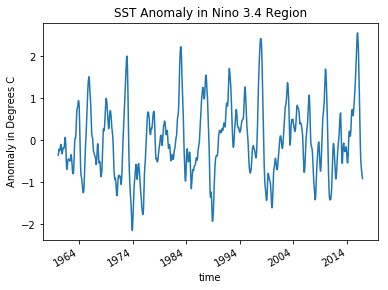

In [45]:
fig, ax = plt.subplots()
ds_anom_rolling = ds_anom.rolling(time=3,center=True).mean()
ds_anom_rolling.plot(ax=ax)
ax.set_title('SST Anomaly in Nino 3.4 Region')
ax.set_ylabel('Anomaly in Degrees C')

### 2. Calculate boolean timeseries representing the positive / negative enso phases

Plot them somehow.

Text(0.5,1,'Boolean for Positive ENSO phases')

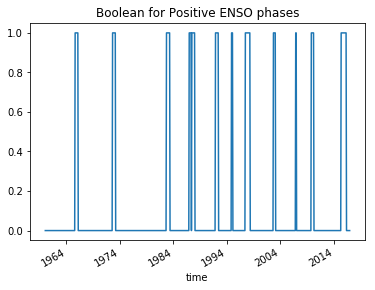

In [48]:
fig, ax1 = plt.subplots()
positive_enso = ds_anom_rolling.where(ds_anom_rolling >= 1)
boolean_var_positive = ds_anom_rolling >= 1
boolean_var_positive.plot(ax=ax1)
ax1.set_title('Boolean for Positive ENSO phases')

Text(0.5,1,'Boolean for Negative ENSO phases')

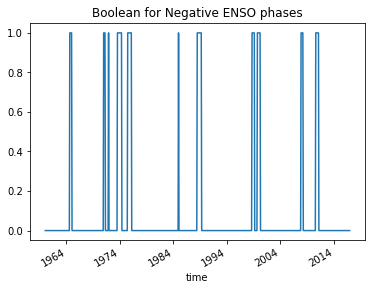

In [50]:
fig, ax2 = plt.subplots()
positive_enso = ds_anom_rolling.where(ds_anom_rolling <= - 1)
boolean_var_negative = ds_anom_rolling <= -1
boolean_var_negative.plot(ax=ax2)
ax2.set_title('Boolean for Negative ENSO phases')

### 3. Plot composites of SST anomaly for the positive and negative ENSO regimes

Text(0.5,1,'SST anomaly for positive ENSO phases')

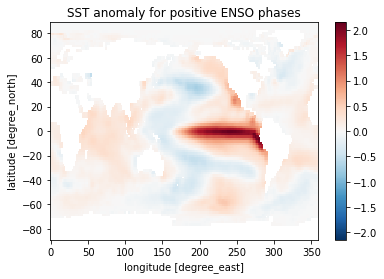

In [52]:
fig, ax3 = plt.subplots()
ds_anom_tot = ds.sst.groupby('time.month').apply(remove_time_mean)
pos_enso= ds_anom_tot.where(boolean_var_positive).mean(dim='time')
pos_enso.plot(ax=ax3)
ax3.set_title('SST anomaly for positive ENSO phases')

Text(0.5,1,'SST anomaly for negative ENSO phases')

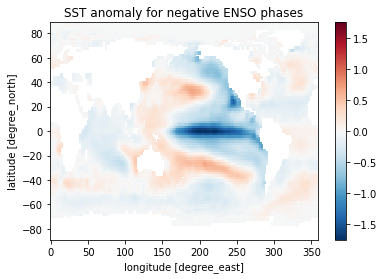

In [51]:
fig, ax4 = plt.subplots()
neg_enso= ds_anom_tot.where(boolean_var_negative).mean(dim='time')
neg_enso.plot(ax=ax4)
ax4.set_title('SST anomaly for negative ENSO phases')

Now load the following dataset of precipitation.

I have given you the code to fix the broken date variable.

In [23]:
import pandas as pd
import xarray as xr
url = 'http://iridl.ldeo.columbia.edu/SOURCES/.NASA/.GPCP/.V2p1/.multi-satellite/.prcp/dods'
dsp = xr.open_dataset(url, decode_times=False)
true_time = (pd.date_range(start='1960-01-01', periods=len(dsp['T']), freq='MS')
             +pd.Timedelta(days=14))
dsp['T'] = true_time
dsp = dsp.rename({'T': 'time'})
dsp.load()

<xarray.Dataset>
Dimensions:  (X: 144, Y: 72, time: 361)
Coordinates:
  * time     (time) datetime64[ns] 1960-01-15 1960-02-15 1960-03-15 ...
  * Y        (Y) float32 88.75 86.25 83.75 81.25 78.75 76.25 73.75 71.25 ...
  * X        (X) float32 1.25 3.75 6.25 8.75 11.25 13.75 16.25 18.75 21.25 ...
Data variables:
    prcp     (time, Y, X) float32 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    Conventions:  IRIDL

### 4. Calculate the composite of preciptiation for positive and negative ENSO phases.

Plot the *difference* between these two fields.

Text(0.5,1,'Precipitation for positive ENSO phases')

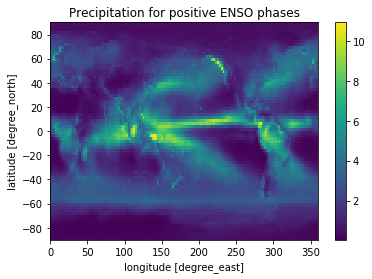

In [53]:
fig, ax5 = plt.subplots()
ds_prec = dsp.prcp.groupby('time.month')
pos_enso_prec= ds_prec.where(boolean_var_positive).mean(dim='time')
pos_enso_prec.plot(ax=ax5)
ax5.set_title('Precipitation for positive field')

Text(0.5,1,'Precipitation for negative field')

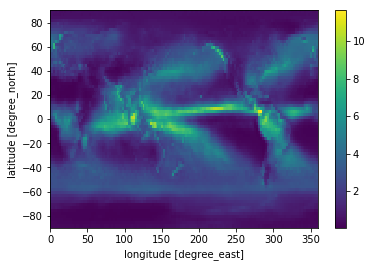

In [54]:
fig, ax6 = plt.subplots()
neg_enso_prec= ds_prec.where(boolean_var_negative).mean(dim='time')
neg_enso_prec.plot(ax=ax6)
ax5.set_title('Precipitation for negative field')

Text(0.5,1,'Precipitation composite of preciptiation for positive and negative ENSO phases')

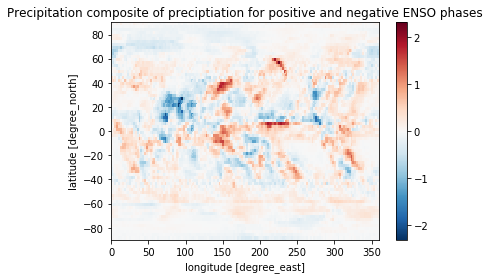

In [55]:
fig, ax7 = plt.subplots()
diff = pos_enso_prec - neg_enso_prec
diff.plot(ax=ax7)
ax7.set_title('Precipitation composite of preciptiation for positive and negative ENSO phases')